In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
img=image.load_img("mini_project/train/bin/1.jpg")

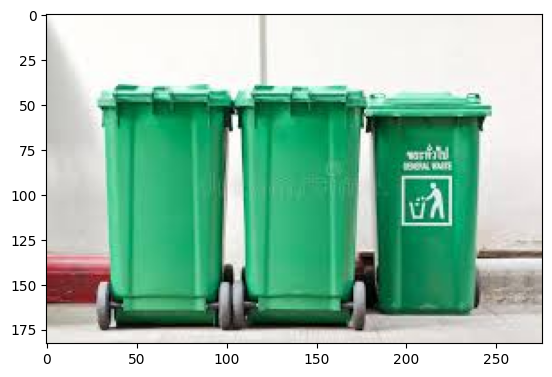

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("mini_project/train/bin/1.jpg").shape

(183, 276, 3)

In [5]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset=train.flow_from_directory('mini_project/train/',
                                       target_size=(200,200),
                                       batch_size=3,
                                       class_mode='binary')
validation_dataset=validation.flow_from_directory('mini_project/validation/',
                                       target_size=(200,200),
                                       batch_size=3,
                                       class_mode='binary')


Found 118 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


In [8]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  ##
                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                 ])

In [11]:
model.compile(loss= 'binary_crossentropy',
             optimizer = RMSprop(lr=0.001),
             metrics=['accuracy'])

In [25]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs= 50,
                     validation_data= validation_dataset)

Epoch 1/50
3/3 [==============================] - 2s 706ms/step - loss: 0.4119 - accuracy: 0.8889 - val_loss: 0.2672 - val_accuracy: 0.9322
Epoch 2/50
3/3 [==============================] - 1s 577ms/step - loss: 0.2799 - accuracy: 0.8571 - val_loss: 0.2141 - val_accuracy: 0.9237
Epoch 3/50
3/3 [==============================] - 1s 569ms/step - loss: 0.4065 - accuracy: 0.8889 - val_loss: 0.1925 - val_accuracy: 0.9492
Epoch 4/50
3/3 [==============================] - 1s 547ms/step - loss: 0.2573 - accuracy: 0.8889 - val_loss: 0.3151 - val_accuracy: 0.8729
Epoch 5/50
3/3 [==============================] - 1s 548ms/step - loss: 0.1158 - accuracy: 1.0000 - val_loss: 0.1579 - val_accuracy: 0.9492
Epoch 6/50
3/3 [==============================] - 1s 538ms/step - loss: 0.1595 - accuracy: 0.8889 - val_loss: 0.3173 - val_accuracy: 0.8898
Epoch 7/50
3/3 [==============================] - 1s 538ms/step - loss: 0.2835 - accuracy: 0.8889 - val_loss: 0.5575 - val_accuracy: 0.7542
Epoch 8/50
3/3 [====

In [20]:
validation_dataset.class_indices

{'bin': 0, 'bin_overflow': 1}

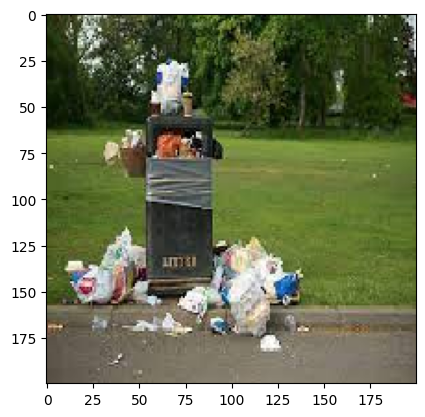

1/1 [==============================] - 0s 45ms/step
Dustbin is Overflowed


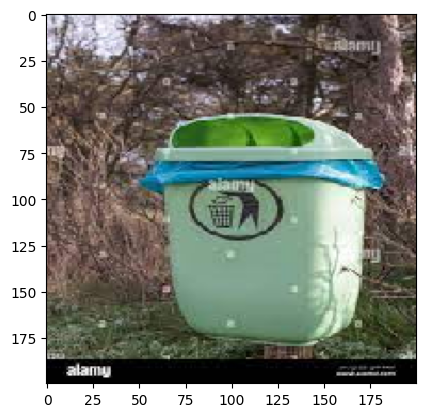

1/1 [==============================] - 0s 68ms/step
Dustbin is Overflowed


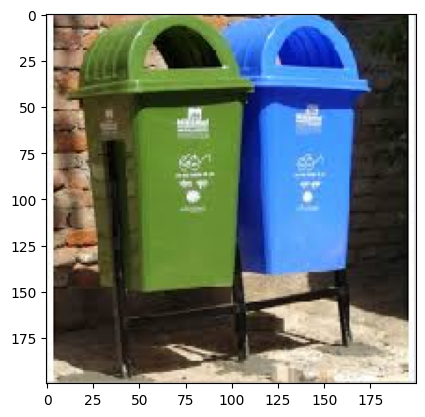

1/1 [==============================] - 0s 44ms/step
Dustbin is Not Overflowed


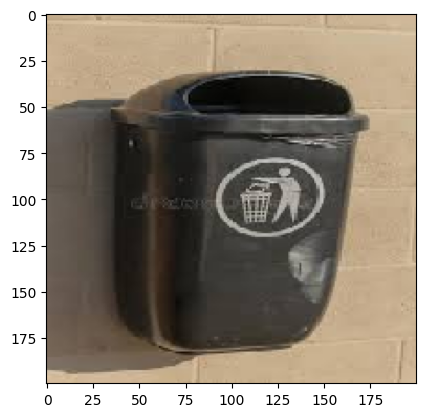

1/1 [==============================] - 0s 38ms/step
Dustbin is Not Overflowed


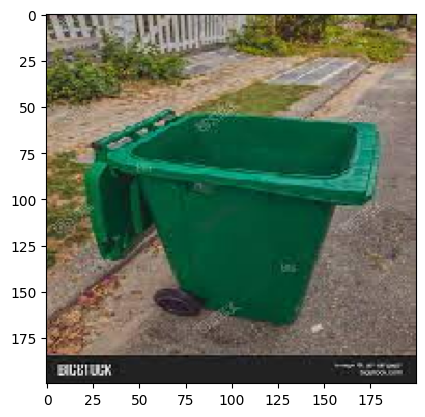

1/1 [==============================] - 0s 38ms/step
Dustbin is Overflowed


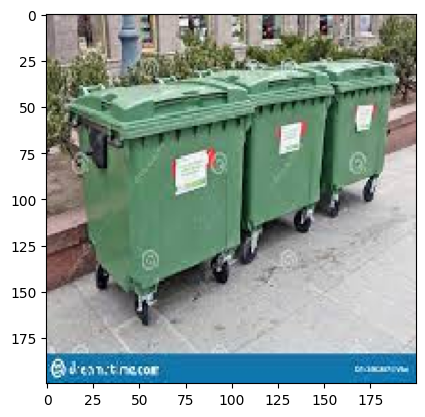

1/1 [==============================] - 0s 36ms/step
Dustbin is Overflowed


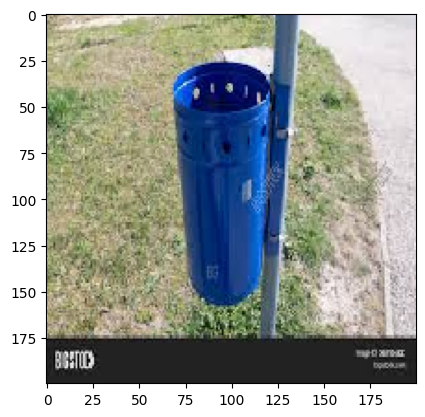

1/1 [==============================] - 0s 56ms/step
Dustbin is Not Overflowed


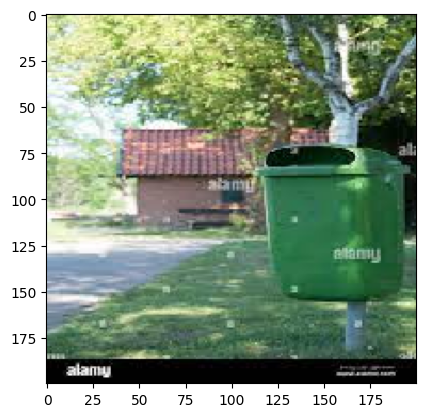

1/1 [==============================] - 0s 38ms/step
Dustbin is Overflowed


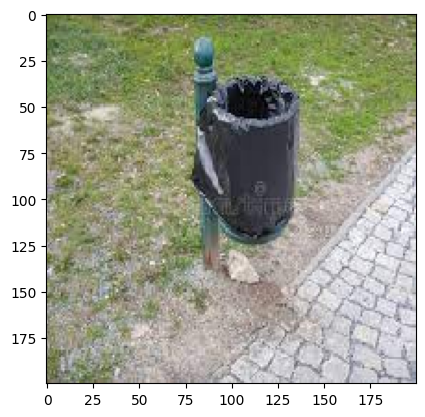

1/1 [==============================] - 0s 56ms/step
Dustbin is Not Overflowed


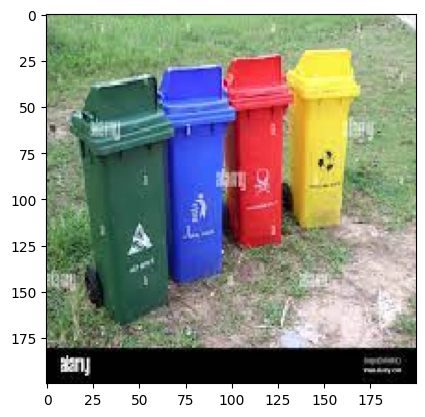

1/1 [==============================] - 0s 48ms/step
Dustbin is Overflowed


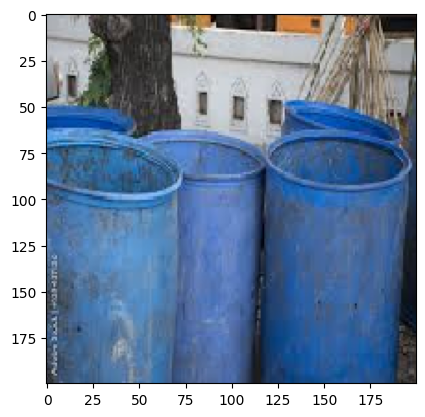

1/1 [==============================] - 0s 36ms/step
Dustbin is Not Overflowed


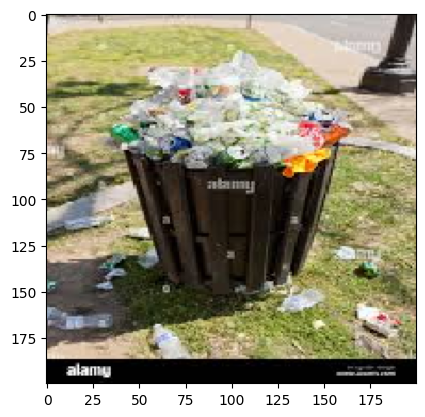

1/1 [==============================] - 0s 41ms/step
Dustbin is Overflowed


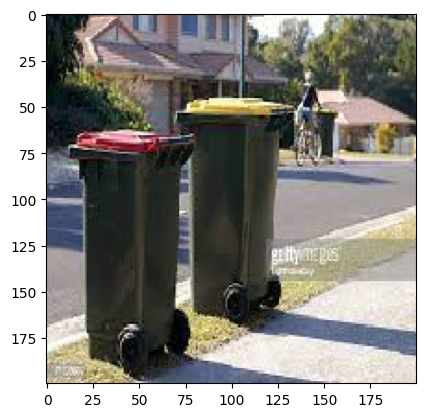

1/1 [==============================] - 0s 38ms/step
Dustbin is Not Overflowed


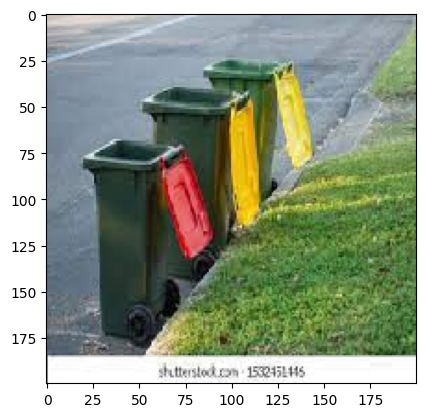

1/1 [==============================] - 0s 48ms/step
Dustbin is Not Overflowed


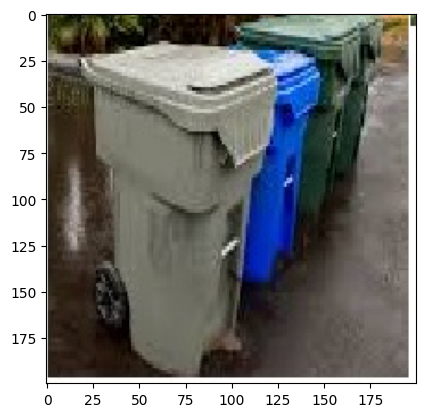

1/1 [==============================] - 0s 51ms/step
Dustbin is Overflowed


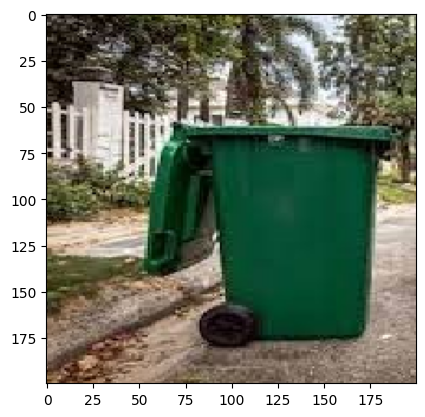

1/1 [==============================] - 0s 41ms/step
Dustbin is Overflowed


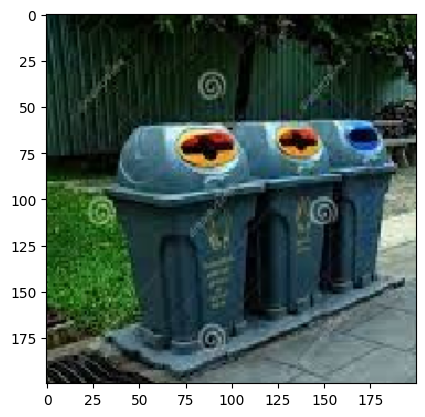

1/1 [==============================] - 0s 52ms/step
Dustbin is Not Overflowed


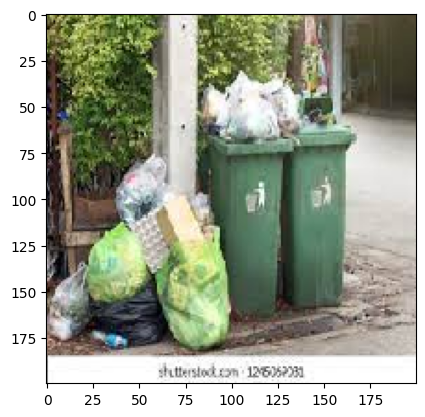

1/1 [==============================] - 0s 50ms/step
Dustbin is Overflowed


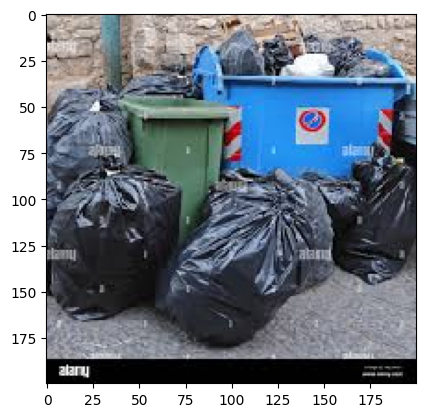

1/1 [==============================] - 0s 42ms/step
Dustbin is Overflowed


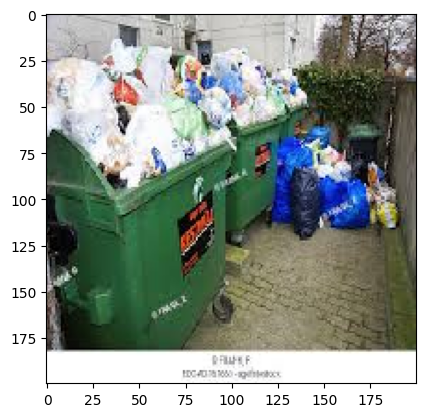

1/1 [==============================] - 0s 46ms/step
Dustbin is Overflowed


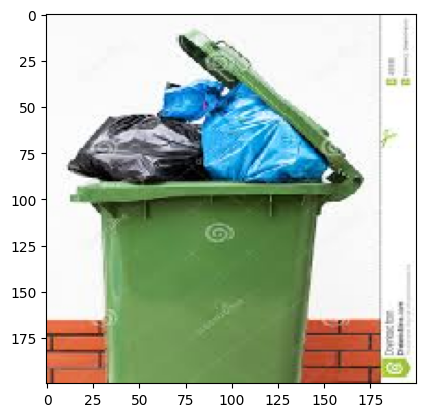

1/1 [==============================] - 0s 48ms/step
Dustbin is Overflowed


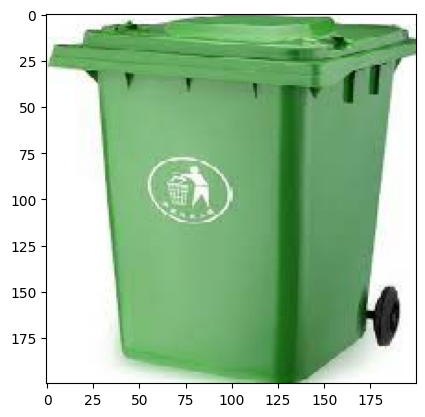

1/1 [==============================] - 0s 33ms/step
Dustbin is Not Overflowed


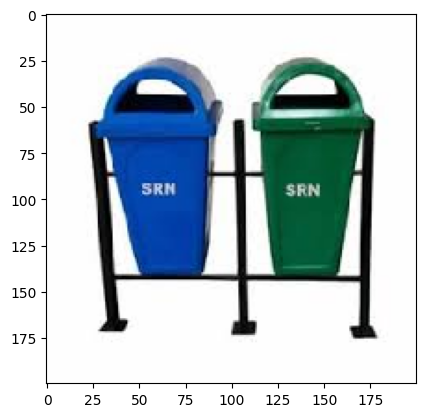

1/1 [==============================] - 0s 35ms/step
Dustbin is Not Overflowed


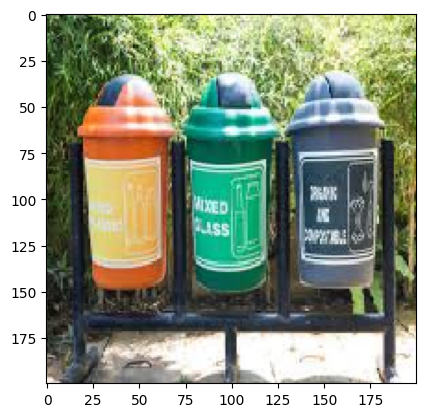

1/1 [==============================] - 0s 64ms/step
Dustbin is Not Overflowed


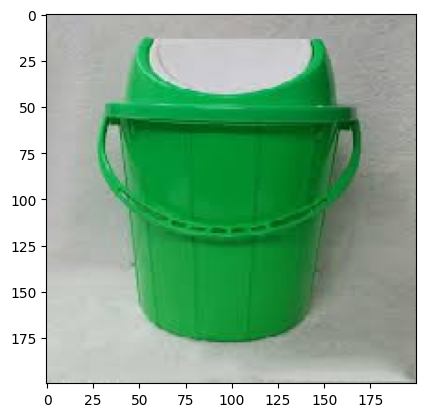

1/1 [==============================] - 0s 35ms/step
Dustbin is Not Overflowed


In [24]:
dir_path = 'mini_project/testing'

for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+'//'+ i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis =0)
    images = np.vstack([X])
    val= model.predict(images)
    if val == 0:
        print("Dustbin is Not Overflowed")
    else:
        print("Dustbin is Overflowed")